In [24]:
import geopandas as gpd
import geoplot as gplt
import pandas as pd
import fiona
import os
import seaborn as sns
import matplotlib.pyplot as plt
current_dir=os.getcwd()
current_dir
#help(fiona.open)

'/home/angelica/Documents/py_linux/pylocss/src'

In [16]:
#get brazil first 
world = gpd.read_file(
    gpd.datasets.get_path('naturalearth_lowres')
)

south_america = world.query('continent == "South America"')
#world['continent'].unique()
world.columns

Index(['pop_est', 'continent', 'name', 'iso_a3', 'gdp_md_est', 'geometry'], dtype='object')

/home/angelica/.conda/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:903: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:
/home/angelica/.conda/envs/geo_env/lib/python3.10/site-packages/geoplot/geoplot.py:1004: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for subgeom in geom:


<AxesSubplot:>

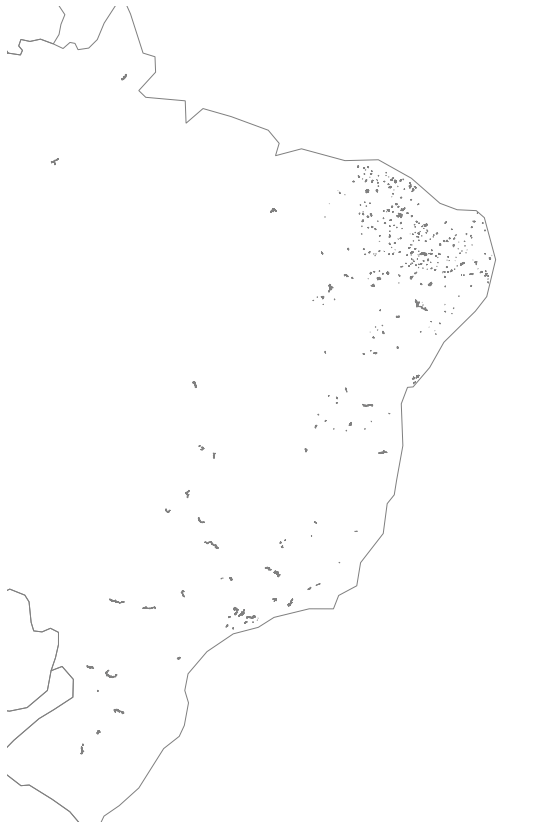

In [20]:
#read shapefiles



shp_dir='../data/spatial/'
shp_name='joined_hydrolakes_brazilr.shp'
gdf_lake_br_hl=gpd.read_file(shp_dir + shp_name)
ax = geoplot.polyplot(south_america, edgecolor='gray', figsize = (20,15))
gplt.choropleth(gdf_lake_br_hl, hue = gdf_lake_br_hl['area_km'], edgecolor = 'gray', cmap='Greens', ax=ax)
#gdf_lake_br_hl.head(3)

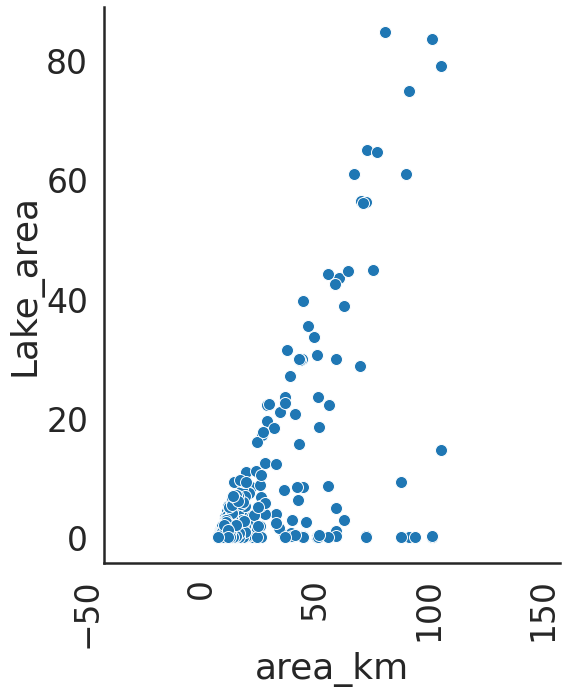

In [26]:
#plot areas between lakes from hydrolakes and brazilian lakes (reservoirs)

sns.set_style('white')
sns.set_context('poster', font_scale=1.5)

df=gdf_lake_br_hl[['area_km','Lake_area']].copy()

facet_c='gauge_id'
x_field='area_km'
y_field='Lake_area'
facet_c='Country_State'
#y_lim=[0,10]
#kind_plot='line'
g_n=sns.relplot(data=df,x=x_field,y=y_field,#hue=hue,
             #legend=True, color=palette,
             #kind=kind_plot,
             #col_wrap=3,
             #col=facet_c,# col_order=facet_c_order,
             #row=facet_r,row_order=facet_r_order,
             aspect=.9,
             height=10)
g_n.set_xticklabels(rotation=90, horizontalalignment='right')
#plt.ylim(y_lim[0],y_lim[1])
#g_n.savefig('../data/20220204.png')

plt.show()